In [1]:
import pandas as pd

In [2]:
####################################################################
# Import network
####################################################################

networkDS = pd.read_csv('./data/adjDataset.tsv', sep='\t')
networkDS

,TF,target,importance
0,RPL6,RPL9,4.349956e+02
1,RPL6,RPL5,4.060449e+02
2,RPL6,RPS3A,3.924514e+02
3,RPL6,RPL18,3.697235e+02
4,RPL6,RPL13,3.601602e+02
...,...,...,...
183202,GTF3A,WDR47,4.335981e-10
183203,GTPBP6,RAP1GAP2,3.715861e-10
183204,GTPBP6,ADAMTS19,3.431918e-10
183205,SMARCB1,CCDC170,1.186833e-10


In [3]:
####################################################################
# Import lists of genes
####################################################################

# Import HSA21 genes
HSA21genesDataframe = pd.read_csv("./data/HSA21_genes_biomaRt_conversion.csv")
HSA21genes = [x for x in HSA21genesDataframe["hgnc_symbol"] if str(x) != 'nan']
len(HSA21genes)

225

In [4]:
# Import more HSA21 genes
HSA21genesDataframeFull = pd.read_csv("./data/fullHSA21genes.csv")
HSA21genesFull = [x for x in HSA21genesDataframeFull["hgnc_symbol"] if str(x) != 'nan']

count = 0
for geneA in HSA21genes:
    if geneA in HSA21genesFull:
        count += 1
    else:
        HSA21genesFull.append(geneA)
HSA21genes = HSA21genesFull
len(HSA21genes)

259

In [5]:
# Import Transcription Factors
TFsList = open("./data/TFs.txt", "r").read().split("\n")
len(TFsList)

1840

In [6]:
# Create list for TFs that also are HSA21 genes
HSA21_TFs = []
for gene in HSA21genes:
    if gene in TFsList:
        HSA21_TFs.append(gene)

HSA21Regulators = [
    "ZNF294", "LTN1", "RNF160", 
    "ZNF295", "ZBTB21", "KIAA1227",
    "Pred65", "ZNF355P", "PRED65", 
    "ZNF298", "PRDM15", 
    "APECED", 
    "KIAA0136", "MORC3", "ZCWCC3", "NXP2",
    "GCFC", "PAXBP1", "GCFC1",
    "SON", "NREBP", "BASS1",
    "PKNOX1", "PREP1", 
    "HSF2BP", "MEILB2", "POF19",
    "NRIP1", "RIP140", "NRIP1"
]

HSA21_TFs += HSA21Regulators
HSA21_TFs

['PRDM15',
 'SOD1',
 'GABPA',
 'BACH1',
 'ERG',
 'ETS2',
 'RUNX1',
 'SIM2',
 'HLCS',
 'TFF3',
 'PKNOX1',
 'U2AF1',
 'AIRE',
 'OLIG1',
 'ADARB1',
 'OLIG2',
 'ZNF294',
 'LTN1',
 'RNF160',
 'ZNF295',
 'ZBTB21',
 'KIAA1227',
 'Pred65',
 'ZNF355P',
 'PRED65',
 'ZNF298',
 'PRDM15',
 'APECED',
 'KIAA0136',
 'MORC3',
 'ZCWCC3',
 'NXP2',
 'GCFC',
 'PAXBP1',
 'GCFC1',
 'SON',
 'NREBP',
 'BASS1',
 'PKNOX1',
 'PREP1',
 'HSF2BP',
 'MEILB2',
 'POF19',
 'NRIP1',
 'RIP140',
 'NRIP1']

In [7]:
# Import Neuro Development Disease genes
neuroDDdf = pd.read_csv('./data/NDDgenes.csv')
neuroDDdf = neuroDDdf[neuroDDdf["High Confidence NDD genes"] == True]
neuroDD = neuroDDdf["Symbol"].tolist()
len(neuroDD)

1586

In [8]:
# Import NeuroDevelopmental Genes
neuroDevGenesDF = pd.read_csv('./data/NervousSystemDevelopmentGO.tsv', sep='\t')
neuroDevGenes = neuroDevGenesDF["Gene"].tolist()
len(neuroDevGenes)
# Select only relevant GO Terms
# In this case I have decided to include all genes

4815

In [9]:
regulatedGenes = pd.read_csv('./data/superGeneOrderDataframe-pval<0.01.csv')
regulatedGenes = regulatedGenes.set_index('Gene')
regulatedGenes['Mean'] = regulatedGenes.mean(axis=1)
upDownRegulated = regulatedGenes['Mean'].to_dict()
regulatedGenes

,IN_2,IN_1,IN,nIN_1,nIN,nEN_1,nEN,IPC,MGE,RG,Mean
Gene,,,,,,,,,,,
LINC01409,0.347271,-0.663075,-0.668930,0.855479,-2.944556,0.425603,0.174239,-0.126681,0.095841,-0.064386,-0.256919
LINC01128,0.345923,-2.846940,0.591948,0.402350,-2.859292,0.828230,0.712282,-1.413110,-0.098942,-0.012728,-0.435028
AL645608.6,1.217709,0.099018,-0.154763,1.322247,-1.647330,0.896042,0.543718,-0.211704,-0.814285,-0.147440,0.110321
SAMD11,-0.336866,-0.467202,-0.241348,0.353962,-1.370589,1.800136,0.165134,-0.555332,0.240605,-0.696171,-0.110767
NOC2L,-0.148234,-0.217521,-0.487569,0.522000,1.077892,0.529973,-0.147666,-0.142678,-0.488490,-0.114286,0.038342
...,...,...,...,...,...,...,...,...,...,...,...
MT-CYB,0.195976,-0.272919,0.199545,0.281428,-0.304296,0.310947,-0.177389,0.045330,0.097074,-0.038290,0.033741
AC011043.1,-1.000879,-0.105622,0.699476,0.987021,-2.839346,0.454375,0.246574,-0.028093,0.449371,0.094934,-0.104219
AL592183.1,-1.028316,-1.009383,-3.073957,-2.159972,-1.080623,-1.078441,-2.316533,-2.339817,-0.874355,-1.421793,-1.638319


In [10]:
####################################################################
# Map list of genes on networkDS
####################################################################

# Filter network at 50 importance
networkDS = networkDS[networkDS["importance"]>50]

# Type of lists
# HSA21genes TFsList HSA21_TFs neuroDD neuroDevGenes
listDict = {
    "GeneralTF": TFsList,
    "NeuroDev": neuroDevGenes,
    "NeuroDisease": neuroDD,
    "HSA21gene": HSA21genes,
    "HSA21TF": HSA21_TFs,
}
networkDS

,TF,target,importance
0,RPL6,RPL9,434.995598
1,RPL6,RPL5,406.044919
2,RPL6,RPS3A,392.451358
3,RPL6,RPL18,369.723475
4,RPL6,RPL13,360.160228
...,...,...,...
1640,MEIS2,ZHX3,50.052399
1641,RBFOX2,KIRREL3,50.047622
1642,RPL6,GTF3A,50.043773
1643,PBX1,SORCS3,50.032963


In [11]:
keyRegulators = {}

listOfTFs = networkDS["TF"].tolist()

for gene in listOfTFs:
    countGene = listOfTFs.count(gene)
    keyRegulators[gene] = countGene

In [12]:
keyRegulatorsDataFrame = pd.DataFrame(keyRegulators.items(), columns=['Gene', 'RegulatedGenes'])
keyRegulatorsDataFrame = keyRegulatorsDataFrame.sort_values(by=['RegulatedGenes'], ascending=False)
keyRegulatorsDataFrame

,Gene,RegulatedGenes
0,RPL6,151
4,YBX1,151
7,SOX4,135
18,CELF4,93
53,RBFOX2,92
...,...,...
63,SMARCB1,1
57,BHLHE22,1
38,GLIS3,1
21,ID1,1


In [13]:
significantGenes = pd.read_csv("./data/significantGenes-padj<0.05.csv")["x"].to_list()
len(significantGenes)

355

In [14]:
topSignificantRegulators = keyRegulatorsDataFrame[(keyRegulatorsDataFrame["Gene"].isin(significantGenes))]
topSignificantRegulators.head(15)

,Gene,RegulatedGenes
7,SOX4,135
30,SOX5,51
6,ZBTB20,20
46,ID4,14
55,POU2F2,13
32,TCF4,12
14,NR2F1,11
27,EOMES,9
64,HMGN3,9
61,SP9,8


In [15]:
plotNotSignificant = keyRegulatorsDataFrame.set_index('Gene').head(15).to_dict()["RegulatedGenes"]
plotSignificant = topSignificantRegulators.set_index('Gene').head(15).to_dict()["RegulatedGenes"]

# Plot Figures

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

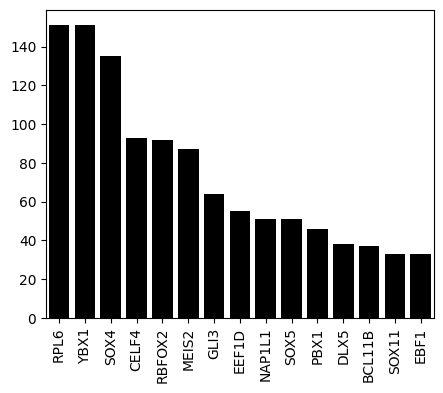

In [25]:
plt.figure(figsize = (5,4))
fig = sns.barplot(x=list(plotNotSignificant.keys()),y=list(plotNotSignificant.values()), color="black")
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.ylim(0, 159)
plt.savefig('../Figures/Figure 7/topNonSignificantGenes', bbox_inches='tight', dpi=500)

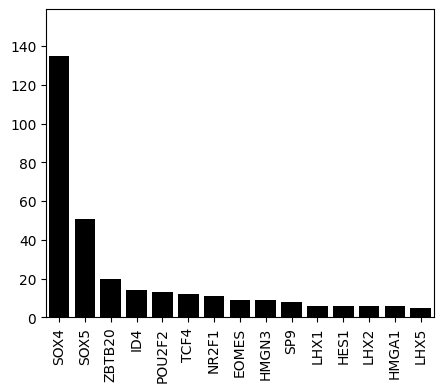

In [26]:
plt.figure(figsize = (5,4))
fig = sns.barplot(x=list(plotSignificant.keys()),y=list(plotSignificant.values()), color="black")
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.ylim(0, 159)
plt.savefig('../Figures/Figure 7/topSignificantGenes', bbox_inches='tight', dpi=500)